# Causes of Death Analysis

## Table of Contents

## 1. Import Libraries and Data

## 1.1 Variables and Data Types (Mortality_all causes_age_sex dataset)

## 2. Data Cleaning and Consistency Check
2.1 Find Missing Values

2.2 Find Duplicates

2.3 Find Mixed-Type Values

## 3. Export Mortality_all causes_age_sex dataframe

## 01. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Create a path
path=r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 6_Advanced Analytics & Dashboard Design\Causes of Death Analysis'

In [3]:
#Import "Mortality_all causes_age_sex.csv" file as df_mortality, using path variable
df_mortality=pd.read_csv(os.path.join(path,'Data','Original Data','Mortality_all causes_age_sex.csv'))

In [4]:
#Check the df
df_mortality.info()
df_mortality.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65856 entries, 0 to 65855
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region Name                   65856 non-null  object 
 1   Country Code                  65856 non-null  object 
 2   Country Name                  65856 non-null  object 
 3   Year                          65856 non-null  int64  
 4   Sex                           65856 non-null  object 
 5   Age Group                     65856 non-null  object 
 6   Number                        65556 non-null  float64
 7   % of cause-specific deaths    65856 non-null  int64  
 8   Age-standardized death rate   2937 non-null   float64
 9   Death rate                    58200 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 5.0+ MB


,count,mean,std,min,25%,50%,75%,max
Year,65856.0,2013.573342,3.039156,2009.000000,2011.000000,2013.000000,2016.000000,2.019000e+03
Number,65556.0,12197.011471,71719.076995,0.000000,49.000000,475.000000,3583.250000,2.854838e+06
% of cause-specific deaths,65856.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
Age-standardized death rate,2937.0,555.431544,220.296892,203.363799,396.098031,503.198636,667.346131,1.784888e+03
Death rate,58200.0,1876.882073,3877.045455,0.000000,62.205125,337.739365,1433.219593,4.500437e+04


In [5]:
#Check the first 5 rows
df_mortality.head()

,Region Name,Country Code,Country Name,Year,Sex,Age Group,Number,% of cause-specific deaths,Age-standardized death rate,Death rate
0,Europe,ALB,Albania,2009,All,[All],15662.0,100,463.339116,534.991710
1,Europe,ALB,Albania,2009,All,[0],187.0,100,NaN,528.681688
2,Europe,ALB,Albania,2009,All,[1-4],90.0,100,NaN,61.468692
3,Europe,ALB,Albania,2009,All,[5-9],60.0,100,NaN,26.593505
4,Europe,ALB,Albania,2009,All,[10-14],60.0,100,NaN,22.765042


In [6]:
#Check the number of rows and columns
df_mortality.shape

(65856, 10)

In [7]:
#Delete special character in "Age Group"
df_mortality1 =  df_mortality["Age Group"].apply(lambda x: x.replace('[','').replace(']',''))

In [37]:
df_mortality1 = df_mortality.replace({'[': ''}, inplace=True)

In [38]:
df_mortality1.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
df_mortality1 = df_mortality.replace('[','', regex=True)

In [39]:
display (df_mortality1)

None

In [8]:
print (df_mortality1)

0            All
1              0
2            1-4
3            5-9
4          10-14
          ...   
65851      70-74
65852      75-79
65853      80-84
65854        85+
65855    Unknown
Name: Age Group, Length: 65856, dtype: object


## 1.1 Variables and Data Types (Mortality_all causes_age_sex dataset)

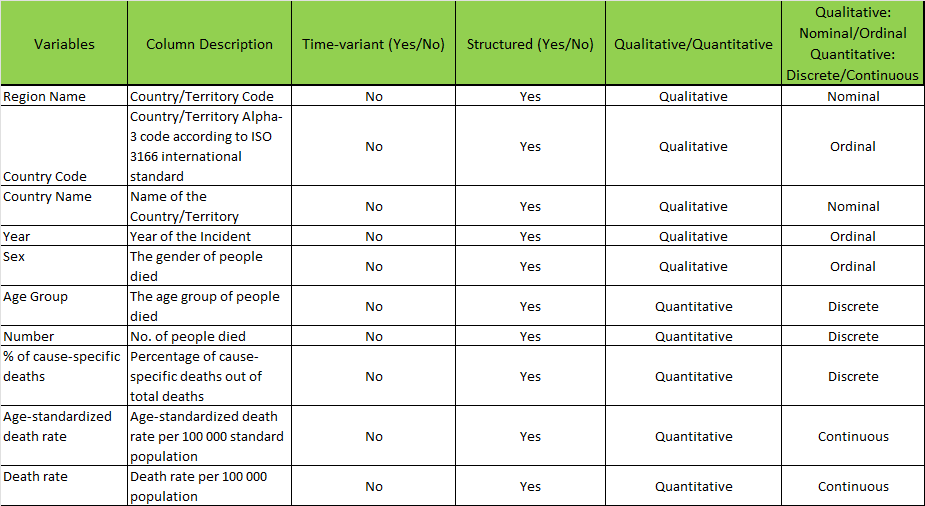

In [9]:
#Check the total number of countries
df_mortality['Country Name'].nunique()

112

In [10]:
#Check the total number of year data provided for each country
df_mortality['Country Name'].value_counts()

Argentina     924
Paraguay      924
Nicaragua     924
Mexico        924
Colombia      924
             ... 
Iraq          126
Albania       126
Mongolia       63
Cabo Verde     63
Lebanon        63
Name: Country Name, Length: 112, dtype: int64

## 02. Data Cleaning and Consistency Check

In [11]:
#Rename the columns
df_mortality.rename(columns = {'Country Name' : 'Country', 'Country Code' : 'Code','Region Name':'Region', '% of cause-specific deaths': '%_of_cs_deaths'}, inplace = True)

In [12]:
df_mortality.head()

,Region,Code,Country,Year,Sex,Age Group,Number,%_of_cs_deaths,Age-standardized death rate,Death rate
0,Europe,ALB,Albania,2009,All,[All],15662.0,100,463.339116,534.991710
1,Europe,ALB,Albania,2009,All,[0],187.0,100,NaN,528.681688
2,Europe,ALB,Albania,2009,All,[1-4],90.0,100,NaN,61.468692
3,Europe,ALB,Albania,2009,All,[5-9],60.0,100,NaN,26.593505
4,Europe,ALB,Albania,2009,All,[10-14],60.0,100,NaN,22.765042


In [13]:
df_mortality2 = df_mortality.rename(columns=lambda x: x.replace("-","_"))

In [14]:
df_mortality2.head()

,Region,Code,Country,Year,Sex,Age Group,Number,%_of_cs_deaths,Age_standardized death rate,Death rate
0,Europe,ALB,Albania,2009,All,[All],15662.0,100,463.339116,534.991710
1,Europe,ALB,Albania,2009,All,[0],187.0,100,NaN,528.681688
2,Europe,ALB,Albania,2009,All,[1-4],90.0,100,NaN,61.468692
3,Europe,ALB,Albania,2009,All,[5-9],60.0,100,NaN,26.593505
4,Europe,ALB,Albania,2009,All,[10-14],60.0,100,NaN,22.765042


In [15]:
# Drop column of index using DataFrame.drop() method
df_mortality2 = df_mortality2.drop(df_mortality2.columns[[7, 8, 9]],axis = 1)

In [16]:
df_mortality2.head()

,Region,Code,Country,Year,Sex,Age Group,Number
0,Europe,ALB,Albania,2009,All,[All],15662.0
1,Europe,ALB,Albania,2009,All,[0],187.0
2,Europe,ALB,Albania,2009,All,[1-4],90.0
3,Europe,ALB,Albania,2009,All,[5-9],60.0
4,Europe,ALB,Albania,2009,All,[10-14],60.0


In [17]:
df_mortality2

,Region,Code,Country,Year,Sex,Age Group,Number
0,Europe,ALB,Albania,2009,All,[All],15662.0
1,Europe,ALB,Albania,2009,All,[0],187.0
2,Europe,ALB,Albania,2009,All,[1-4],90.0
3,Europe,ALB,Albania,2009,All,[5-9],60.0
4,Europe,ALB,Albania,2009,All,[10-14],60.0
...,...,...,...,...,...,...,...
65851,Europe,GBR,United Kingdom,2019,Female,[70-74],26082.0
65852,Europe,GBR,United Kingdom,2019,Female,[75-79],33213.0
65853,Europe,GBR,United Kingdom,2019,Female,[80-84],47413.0
65854,Europe,GBR,United Kingdom,2019,Female,[85+],141998.0


## 2.1 Find Missing Values

In [18]:
#Check for null values
df_mortality2.isnull().sum()

Region         0
Code           0
Country        0
Year           0
Sex            0
Age Group      0
Number       300
dtype: int64

Remove only 300 missing Number of deaths values, as the amount is not significant

In [19]:
df_mortality2.dropna(subset = ['Number'], inplace = True)

In [20]:
df_mortality2.shape

(65556, 7)

In [21]:
df_mortality2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65556 entries, 0 to 65855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     65556 non-null  object 
 1   Code       65556 non-null  object 
 2   Country    65556 non-null  object 
 3   Year       65556 non-null  int64  
 4   Sex        65556 non-null  object 
 5   Age Group  65556 non-null  object 
 6   Number     65556 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.0+ MB


In [22]:
print(df_mortality2)

       Region Code         Country  Year     Sex  Age Group    Number
0      Europe  ALB         Albania  2009     All      [All]   15662.0
1      Europe  ALB         Albania  2009     All        [0]     187.0
2      Europe  ALB         Albania  2009     All      [1-4]      90.0
3      Europe  ALB         Albania  2009     All      [5-9]      60.0
4      Europe  ALB         Albania  2009     All    [10-14]      60.0
...       ...  ...             ...   ...     ...        ...       ...
65851  Europe  GBR  United Kingdom  2019  Female    [70-74]   26082.0
65852  Europe  GBR  United Kingdom  2019  Female    [75-79]   33213.0
65853  Europe  GBR  United Kingdom  2019  Female    [80-84]   47413.0
65854  Europe  GBR  United Kingdom  2019  Female      [85+]  141998.0
65855  Europe  GBR  United Kingdom  2019  Female  [Unknown]       0.0

[65556 rows x 7 columns]


In [23]:
df_mortality2.head()

,Region,Code,Country,Year,Sex,Age Group,Number
0,Europe,ALB,Albania,2009,All,[All],15662.0
1,Europe,ALB,Albania,2009,All,[0],187.0
2,Europe,ALB,Albania,2009,All,[1-4],90.0
3,Europe,ALB,Albania,2009,All,[5-9],60.0
4,Europe,ALB,Albania,2009,All,[10-14],60.0


## 2.2 Find Duplicates

In [24]:
#Check for duplicates
df_dups = df_mortality[df_mortality.duplicated()]

In [25]:
df_mortality_no_dups = df_mortality.drop_duplicates()

In [26]:
df_mortality_no_dups.shape

(65856, 10)

No duplicates

## 2.3 Find Mixed-Type Values

In [27]:
#Check for mixed data type
for col in df_mortality2.columns.tolist():
  weird = (df_mortality2[[col]].applymap(type) != df_mortality2[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_mortality2[weird]) > 0:
    print (col)

In [28]:
df_mortality2.shape

(65556, 7)

In [29]:
df_mortality2.head()

,Region,Code,Country,Year,Sex,Age Group,Number
0,Europe,ALB,Albania,2009,All,[All],15662.0
1,Europe,ALB,Albania,2009,All,[0],187.0
2,Europe,ALB,Albania,2009,All,[1-4],90.0
3,Europe,ALB,Albania,2009,All,[5-9],60.0
4,Europe,ALB,Albania,2009,All,[10-14],60.0


## 3. Export Mortality_all causes_age_sex dataframe

In [30]:
df_mortality2.to_csv(os.path.join(path,'Data','Prepared Data','mortality_cleaned.csv'))